# Reconocimiento de Patrones: Práctica 1
#### Josías Parra
#### José Pablo de la Rosa 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model ## imports datasets from scikit-learn
from IPython.display import Image

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Potenciales Evocados Auditivos del Tronco Cerebral

El BAEP convencional contiene entre 5 y 8 picos etiquetados con números romanos, siendo los picos I-V son los picos de mayor interés clínico.

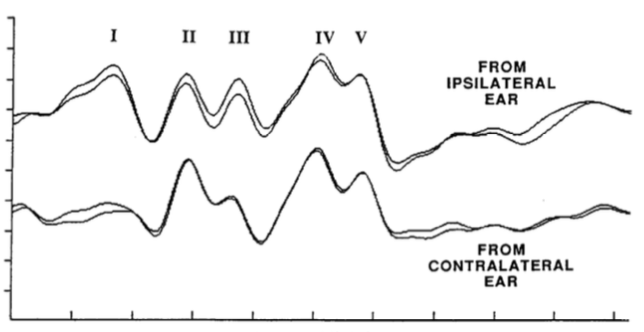

In [235]:
potenciales=Image(filename='Potenciales.png')
potenciales

# Dataset

Se utilizó el dataset obtenido experimentalmente en [1], a partir de la recuperación de 165 diagnósticos de potenciles evocados auditivos de infantes, niños y adultos jóvenes entre los rangos de edad de 36 semanas - 20 años.

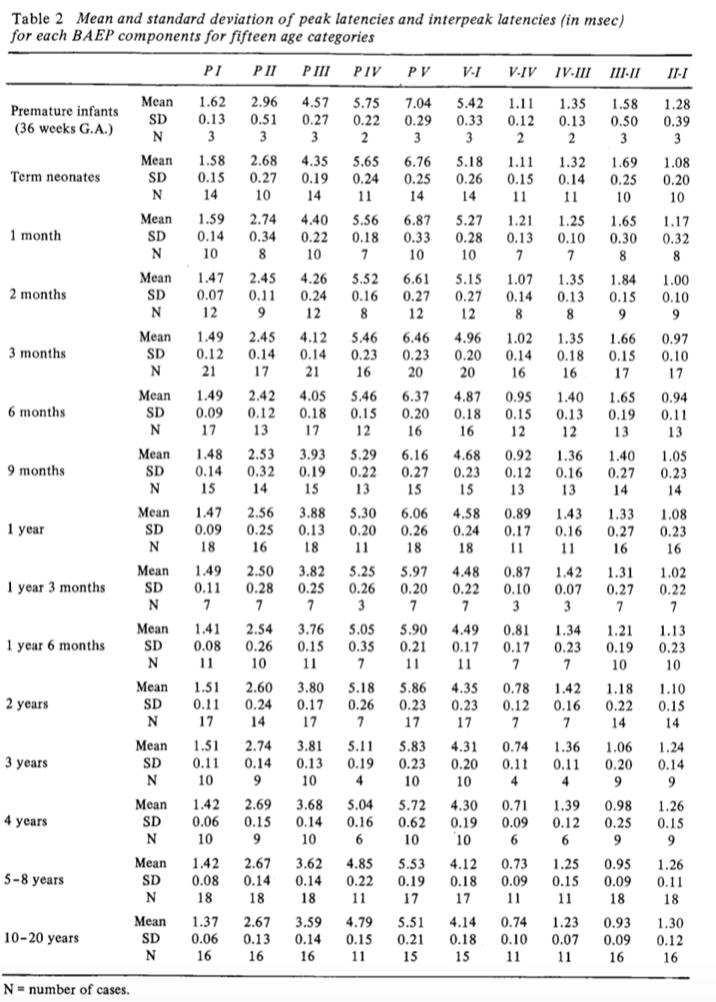

In [233]:
dataset=Image(filename='Datos.png')
dataset

# Implementación 

El dataset utilizado fue exportado de un archivo de excel y manejado como un Dataframe de Panda; mismo que se dividió en dos dataframes: target_V_I (Variables dependientes y), predictor (Variables independientes X).

In [3]:
#Asignar nombre de archivo de Excel a 'file'
file="Dataset_potenciales.xlsx"
#Cargar hoja de cálculo
xl=pd.ExcelFile(file)
#Obtener nombre de página
sh_name=xl.sheet_names[0]
#Cargar archivo en DataFrame df1
df1=xl.parse(sh_name)
predictor=pd.DataFrame(df1,columns=["Age (Months)"])
target_V_I=pd.DataFrame(df1,columns=["V-I"])
datas=pd.DataFrame(df1,columns=["Age (Months)","V-I"])

Utilizando la librería sklearn, se construyó la instancia de un modelo lineal; mismo que fue entrenado por medio de la función lm.fit(predictor,target). Los resultados fueron gráficados y comparados con los valores reales. 

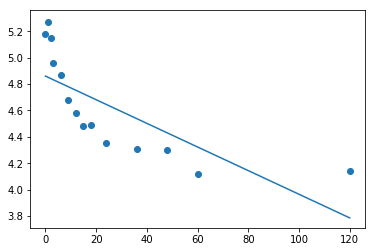

0.567344166092522

In [4]:
lm=linear_model.LinearRegression()
model=lm.fit(predictor,target_V_I)
#print(datas['Age (Months)'])
predictions=pd.DataFrame(model.predict(pd.DataFrame(datas,columns=["Age (Months)"])))
predictions.rename(columns={0:'Predictions'}, inplace=True)
predictions=predictions.join(datas)
plt.scatter('Age (Months)', 'V-I', data=predictions)
plt.plot('Age (Months)', 'Predictions', data=predictions)
plt.show()
lm.score(predictor,target_V_I)

Se repite la regresión dividiendo los datos de entrada en dos rangos: pacientes con edades menores a dos años y pacientes con edades superiores o iguales a dos años.

# Infantes > 2 años

0.922948895935049


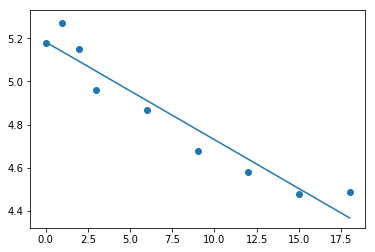

In [5]:
predictions_inf=predictions.loc[predictions['Age (Months)']<24]
predictions_inf=predictions_inf.drop(['Predictions'],axis=1)
predictor_inf=pd.DataFrame(predictions_inf['Age (Months)'])
target_inf=pd.DataFrame(predictions_inf['V-I'])


lm_inf=linear_model.LinearRegression()
model_inf=lm_inf.fit(predictor_inf,target_inf)

#print(datas['Age (Months)'])
pred_inf=pd.DataFrame(model_inf.predict(pd.DataFrame(predictions_inf,columns=["Age (Months)"])))
pred_inf.rename(columns={0:'Predictions'}, inplace=True)
predictions_inf=pred_inf.join(predictions_inf)
plt.scatter('Age (Months)', 'V-I', data=predictions_inf)
plt.plot('Age (Months)', 'Predictions', data=predictions_inf)
print(lm_inf.score(predictor_inf,target_inf))
plt.show()

#  > 2 años

0.60398096042449


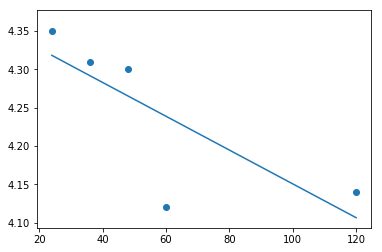

In [6]:
predictions_chi=predictions.loc[predictions['Age (Months)']>=24]
predictions_chi=predictions_chi.drop(['Predictions'],axis=1)
predictor_chi=pd.DataFrame(predictions_chi['Age (Months)'])
target_chi=pd.DataFrame(predictions_chi['V-I'])
lm_chi=linear_model.LinearRegression()
model_chi=lm_chi.fit(predictor_chi,target_chi)
#print(datas['Age (Months)'])
pred_chi=pd.DataFrame(model_chi.predict(pd.DataFrame(predictions_chi,columns=["Age (Months)"])))
pred_chi.rename(columns={0:'Predictions'}, inplace=True)
predictions_chi=pred_chi.join(predictions_chi.reset_index(drop=True))
plt.scatter('Age (Months)', 'V-I', data=predictions_chi)
plt.plot('Age (Months)', 'Predictions', data=predictions_chi)
print(lm_chi.score(predictor_chi,target_chi))
plt.show()

# Ajuste Logarítmico

Una línea de tendencia generada por excel demuestra una aproximación más apropiada para el set de datos completo.

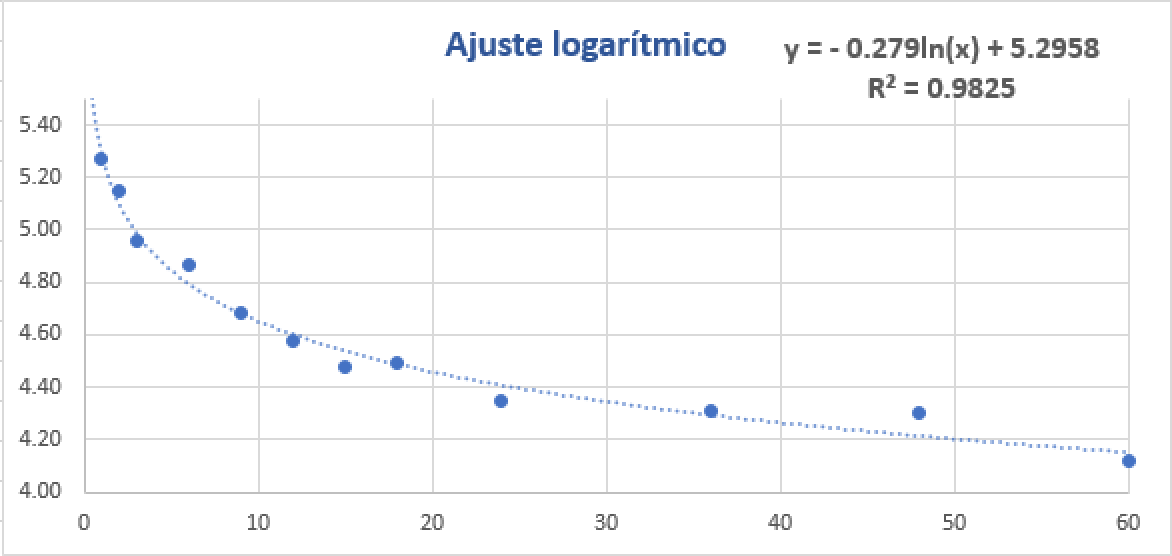

In [231]:
Log_fit=Image(filename='Logarithmic_Fit.png')
Log_fit

# Fuentes

[1] Mochizuki, Yasuhiro, et al. “Developmental Changes of Brainstem Auditory Evoked Potentials (BAEPs) in Normal Human Subjects from Infants to Young Adults.” Brain and Development, vol. 4, no. 2, 1982, pp. 127–136., doi:10.1016/s0387-7604(82)80006-5.